In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?id=1PzAcx0rnsAs96qnAdH9is8JMF9WUHj_W')
data.head()

,iso_code,location,date,new_deaths,new_cases,new_tests,new_vaccinations,new_cases_per_thousand,new_tests_per-thousand,new_vaccinations_per_thousand,stringency_index
0,IND,India,1/16/2021,181,15144,803090,191181,15.144,803.090,191.181,68.98
1,IND,India,1/17/2021,145,13788,779377,33120,13.788,779.377,33.120,68.98
2,IND,India,1/18/2021,137,10050,548168,229748,10.050,548.168,229.748,68.98
3,IND,India,1/19/2021,162,13816,709791,220786,13.816,709.791,220.786,68.98
4,IND,India,1/20/2021,151,15244,764120,131649,15.244,764.120,131.649,68.98


In [ ]:
data['location'].unique()

array(['India', 'Israel', 'Japan'], dtype=object)

In [ ]:
country = "India"
data = data[data['location']==country]

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.sort_values('date',ascending=True,inplace=True)
data['date'].min(), data['date'].max()

(Timestamp('2021-01-16 00:00:00'), Timestamp('2021-07-05 00:00:00'))

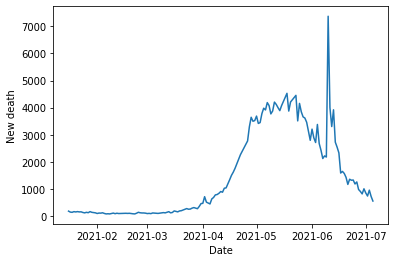

In [ ]:
plt.xlabel('Date')
plt.ylabel('New death')
plt.plot(data['date'],data['new_deaths'])

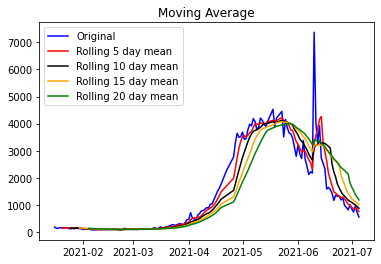

In [ ]:
rolling_mean5 = data['new_deaths'].rolling(window = 5).mean()
rolling_mean10 = data['new_deaths'].rolling(window = 10).mean()
rolling_mean15 = data['new_deaths'].rolling(window = 15).mean()
rolling_mean20 = data['new_deaths'].rolling(window = 20).mean()
plt.plot(data['date'],data['new_deaths'], color = 'blue', label = 'Original')
plt.plot(data['date'],rolling_mean5, color = 'red', label = 'Rolling 5 day mean')
plt.plot(data['date'],rolling_mean10, color = 'black', label = 'Rolling 10 day mean')
plt.plot(data['date'],rolling_mean15, color = 'orange', label = 'Rolling 15 day mean')
plt.plot(data['date'],rolling_mean20, color = 'green', label = 'Rolling 20 day mean')
plt.legend(loc = 'best')
plt.title('Moving Average')
plt.show()

In [ ]:
data['moving_avg_5day'] = rolling_mean5
data['moving_avg_10day'] = rolling_mean10
data['moving_avg_15day'] = rolling_mean15
data['moving_avg_20day'] = rolling_mean20
data.head()

,iso_code,location,date,new_deaths,new_cases,new_tests,new_vaccinations,new_cases_per_thousand,new_tests_per-thousand,new_vaccinations_per_thousand,stringency_index,moving_avg_5day,moving_avg_10day,moving_avg_15day,moving_avg_20day
0,IND,India,2021-01-16,181,15144,803090,191181,15.144,803.090,191.181,68.98,NaN,NaN,NaN,NaN
1,IND,India,2021-01-17,145,13788,779377,33120,13.788,779.377,33.120,68.98,NaN,NaN,NaN,NaN
2,IND,India,2021-01-18,137,10050,548168,229748,10.050,548.168,229.748,68.98,NaN,NaN,NaN,NaN
3,IND,India,2021-01-19,162,13816,709791,220786,13.816,709.791,220.786,68.98,NaN,NaN,NaN,NaN
4,IND,India,2021-01-20,151,15244,764120,131649,15.244,764.120,131.649,68.98,155.2,NaN,NaN,NaN


In [ ]:
data.dropna(inplace=True)

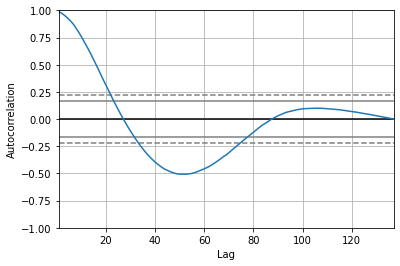

In [ ]:
autocorrelation_plot(data['new_cases'])
plt.show()

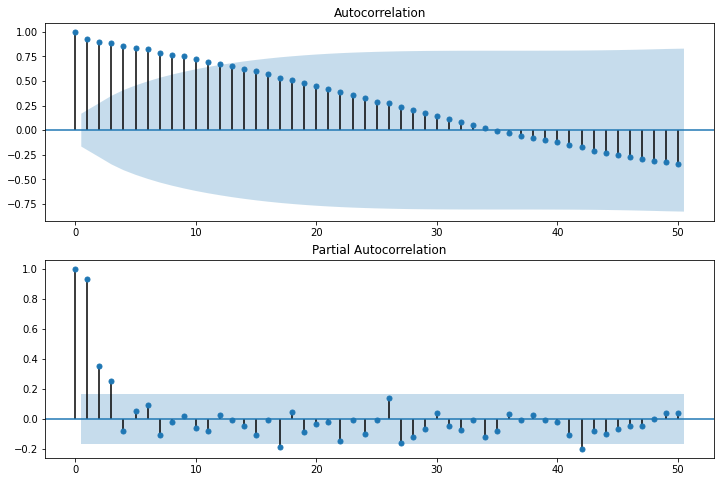

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['new_deaths'].dropna(),lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['new_deaths'].dropna(),lags=50,ax=ax2)


In [ ]:
# 1,1,0 ARIMA Model
model = ARIMA(data.new_deaths, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.new_deaths   No. Observations:                  136
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1051.428
Method:                       css-mle   S.D. of innovations            550.949
Date:                Tue, 12 Oct 2021   AIC                           2108.857
Time:                        16:20:31   BIC                           2117.595
Sample:                             1   HQIC                          2112.408
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.5772     34.798      0.103      0.918     -64.625      71.780
ar.L1.D.new_deaths    -0.3603      0.080     -4.529      0.000      -0.516      -0.204
                    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
# 1,1,0 ARIMA Model
model = ARIMA(data.new_deaths, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.new_deaths   No. Observations:                  136
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1046.044
Method:                       css-mle   S.D. of innovations            529.180
Date:                Tue, 12 Oct 2021   AIC                           2106.088
Time:                        16:20:33   BIC                           2126.477
Sample:                             1   HQIC                          2114.373
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.2970     24.706      0.174      0.862     -44.127      52.721
ar.L1.D.new_deaths    -0.4356      0.085     -5.115      0.000      -0.602      -0.269
ar.L2.D.new_deaths  

Test MAE: 133.595


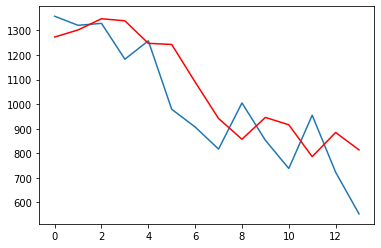

In [ ]:
X = data['new_deaths'].values
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
traindf, testdf = data[0:size], data[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
mae5day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_5day'])
mae10day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_10day'])
mae15day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_15day'])
mae20day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_20day'])

In [ ]:
print(f'Mean absolute error from 5day moving average prediction: {mae5day}')
print(f'Mean absolute error from 10day moving average prediction: {mae10day}')
print(f'Mean absolute error from 15day moving average prediction: {mae15day}')
print(f'Mean absolute error from 20day moving average prediction: {mae20day}')

Mean absolute error from 5day moving average prediction: 110.38571428571426
Mean absolute error from 10day moving average prediction: 297.4928571428572
Mean absolute error from 15day moving average prediction: 670.4666666666666
Mean absolute error from 20day moving average prediction: 991.2785714285712
